In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import scienceplots

plt.style.use(["nature"])

In [2]:
df_1 = pd.read_csv("./Data/Fig4_c_Base_count_level1.csv")
df_2 = pd.read_csv("./Data/Fig4_c_Commented_count_level1.csv")
# normalize
columns_to_convert = df_1.columns[1:]
row_sum = df_1[columns_to_convert].sum(axis=1)
for col in columns_to_convert:
    df_1[col] = df_1[col] / row_sum * 100

columns_to_convert = df_2.columns[1:]
row_sum = df_2[columns_to_convert].sum(axis=1)
for col in columns_to_convert:
    df_2[col] = df_2[col] / row_sum * 100

In [3]:
df_1["Percentile"] = df_1["Percentile"].apply(lambda x: int(x[:-1]))
df_2["Percentile"] = df_2["Percentile"].apply(lambda x: int(x[:-1]))

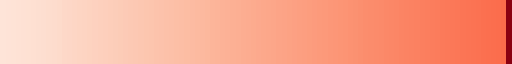

In [4]:
greys = matplotlib.colormaps['Reds']
new_colors = greys(np.linspace(0.1, 0.5, 100))
# dark_grey = np.array([90/256, 90/256, 90/256, 1])
dark_grey = np.array([139/256, 0/256, 18/256, 1])

new_colors[-1,:] = dark_grey
new_greys = matplotlib.colors.ListedColormap(new_colors)

new_greys

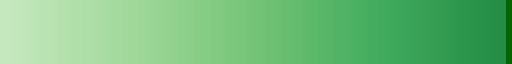

In [5]:
blues = matplotlib.colormaps['Greens']
new_colors = blues(np.linspace(0.25, 0.75, 100))
new_colors[-1, :] = np.array([4/256, 102/256, 5/256, 1])
new_blues = matplotlib.colors.ListedColormap(new_colors)
new_blues

In [6]:
seq = ["Percentile"]+list("KENIMCFZLBGHJAD")

In [7]:
df_both = pd.concat([df_1, df_2])
scatter_x = []
scatter_y = []
for idx, col in enumerate("KENIMCFZLBGHJAD"):
    if col in "KENCHAD":
        scatter_x.append(idx)
        scatter_y.append(df_both[col].max())

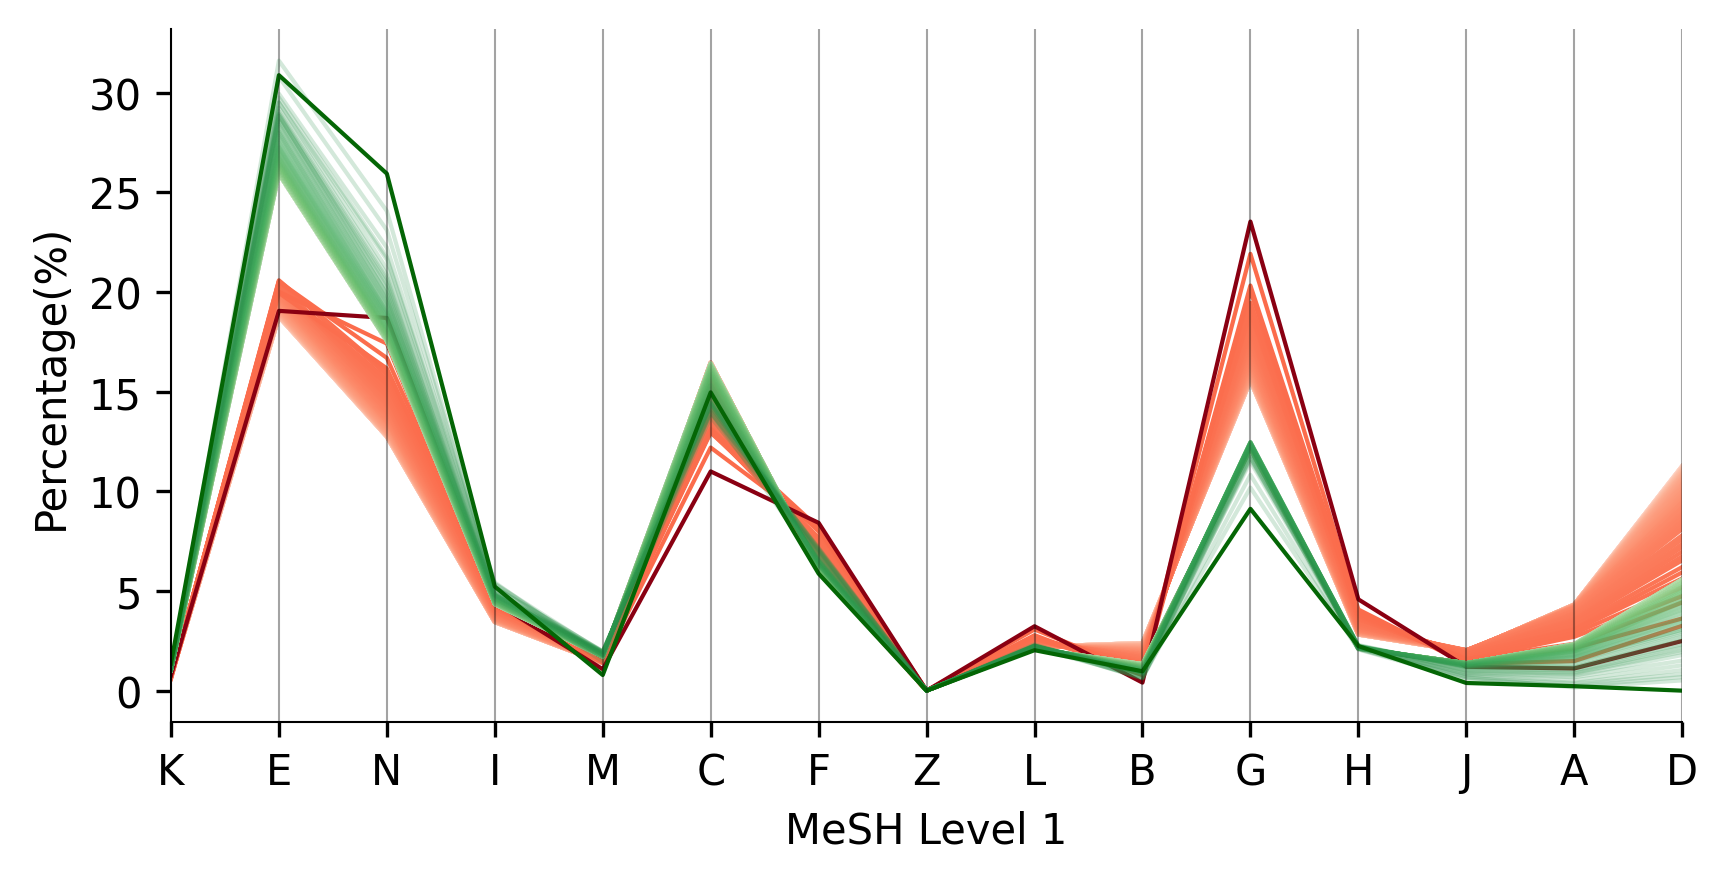

: 

In [8]:
fig = plt.figure(figsize=(6.5,3), dpi=300)
pd.plotting.parallel_coordinates(df_1[seq], "Percentile", colormap=new_greys)
pd.plotting.parallel_coordinates(df_2[seq], "Percentile", colormap=new_blues)
# # dots
# plt.scatter(scatter_x, scatter_y, s=50, c="#0071AD", edgecolors="#CFF6FF", zorder=99)

ax = plt.gca()
for idx, l in enumerate(ax.lines):
    if idx <= 213 and idx >= 115:
        l.set_alpha(0.2)
    if l.get_color() == "black":
        l.set_alpha(0.2)
        l.set_lw(0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend().set_visible(False)
# for idx, l in enumerate(ax.lines):
#     print(l.get_color())

plt.grid(False)
plt.xlabel("MeSH Level 1", fontsize=10)
plt.ylabel("Percentage(%)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()